In [ ]:
import pandas as pd

# Load the COVID-19 dataset from Our World in Data
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [ ]:
# Select relevant columns
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Handle missing values by forward filling
df.fillna(method='ffill', inplace=True)

# Display the cleaned dataset
print(df.head())


        date     location  total_cases  new_cases  total_deaths  new_deaths  \
0 2020-01-05  Afghanistan          0.0        0.0           0.0         0.0   
1 2020-01-06  Afghanistan          0.0        0.0           0.0         0.0   
2 2020-01-07  Afghanistan          0.0        0.0           0.0         0.0   
3 2020-01-08  Afghanistan          0.0        0.0           0.0         0.0   
4 2020-01-09  Afghanistan          0.0        0.0           0.0         0.0   

   total_vaccinations  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  


<ipython-input-3-c2c89529bb64>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


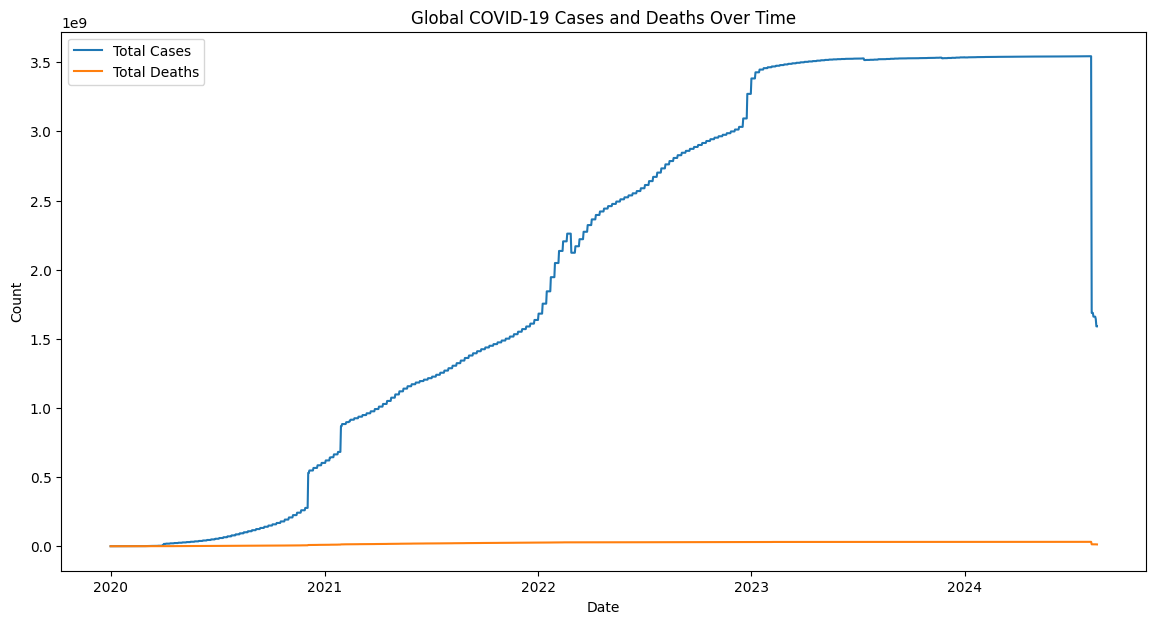

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by date for global analysis
global_data = df.groupby('date').sum().reset_index()

# Plot total cases and deaths over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_cases', data=global_data, label='Total Cases')
sns.lineplot(x='date', y='total_deaths', data=global_data, label='Total Deaths')
plt.title('Global COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


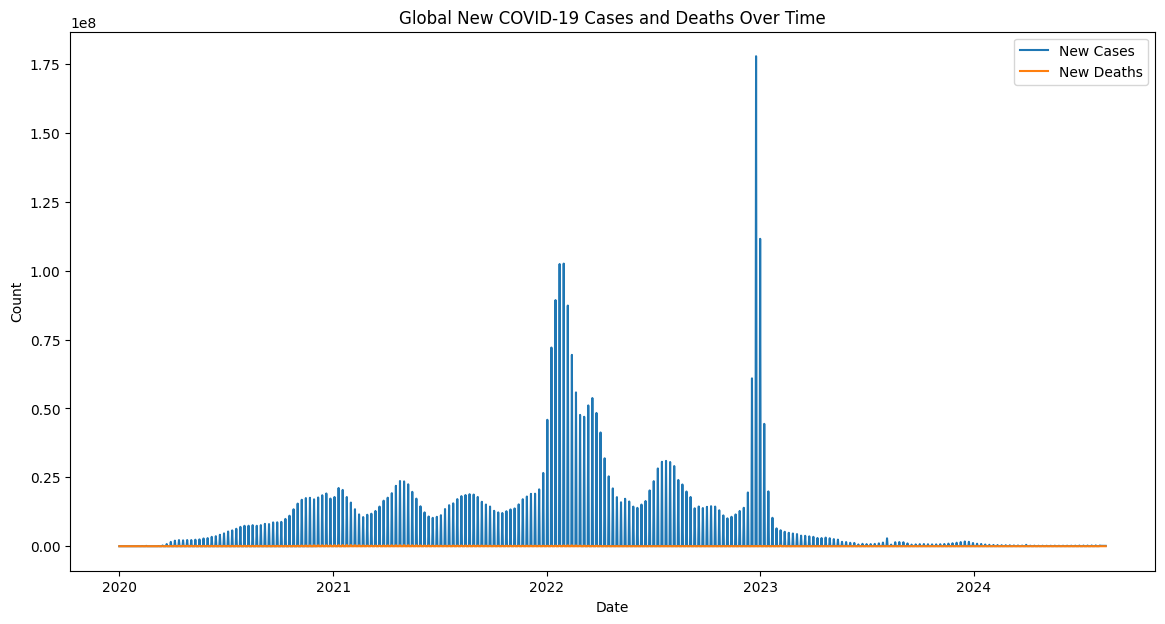

In [ ]:
# Plot new cases and new deaths over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='new_cases', data=global_data, label='New Cases')
sns.lineplot(x='date', y='new_deaths', data=global_data, label='New Deaths')
plt.title('Global New COVID-19 Cases and Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


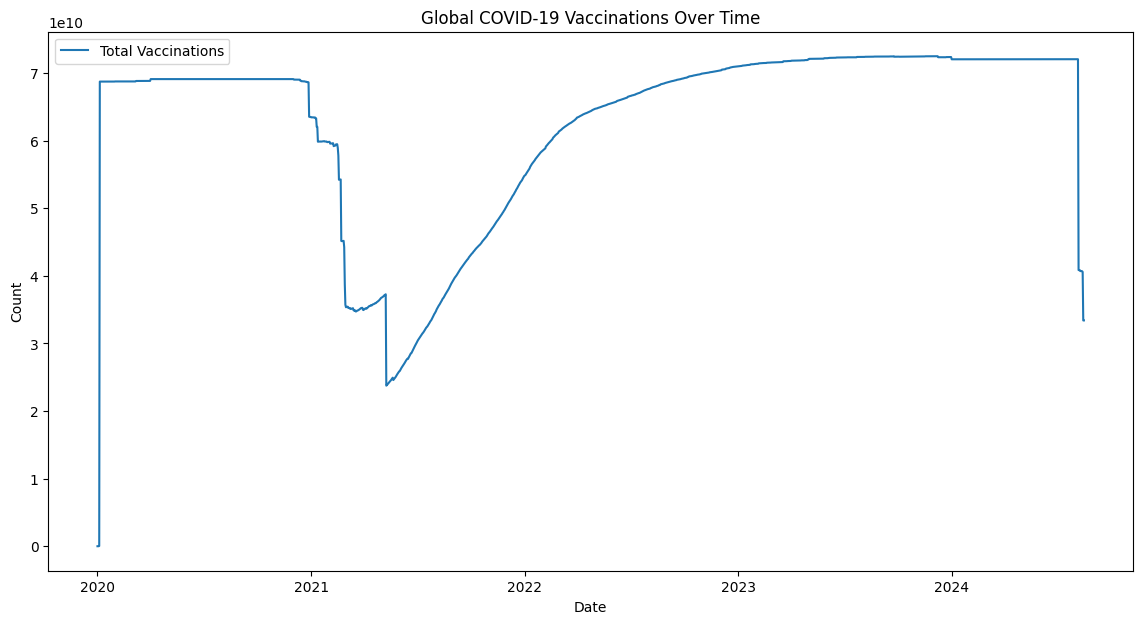

In [ ]:
# Plot total vaccinations over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='total_vaccinations', data=global_data, label='Total Vaccinations')
plt.title('Global COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


<ipython-input-7-ac6777347646>:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
2024-08-20 04:22:43.830 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-08-20 04:22:43.855 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

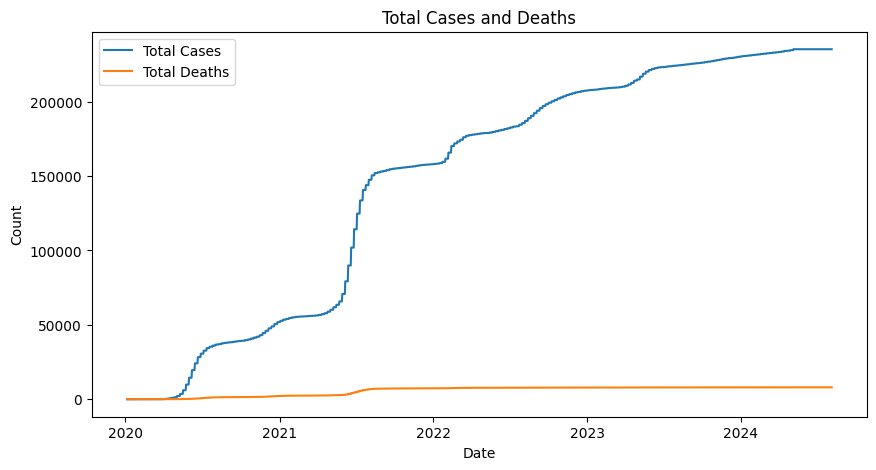

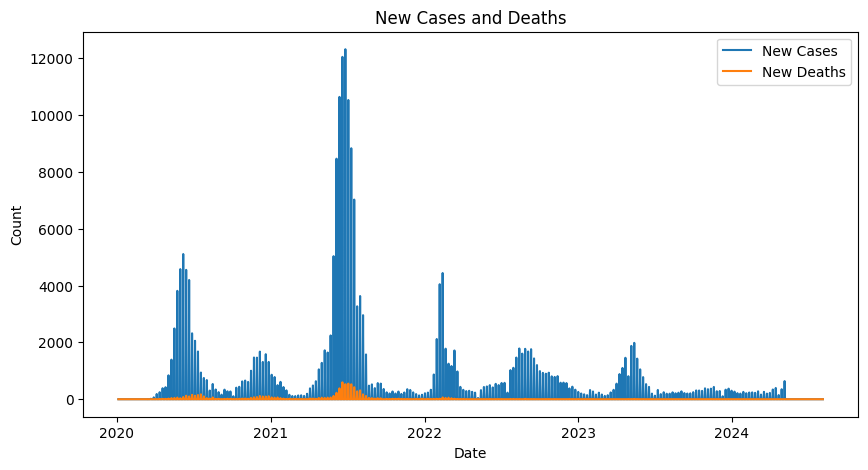

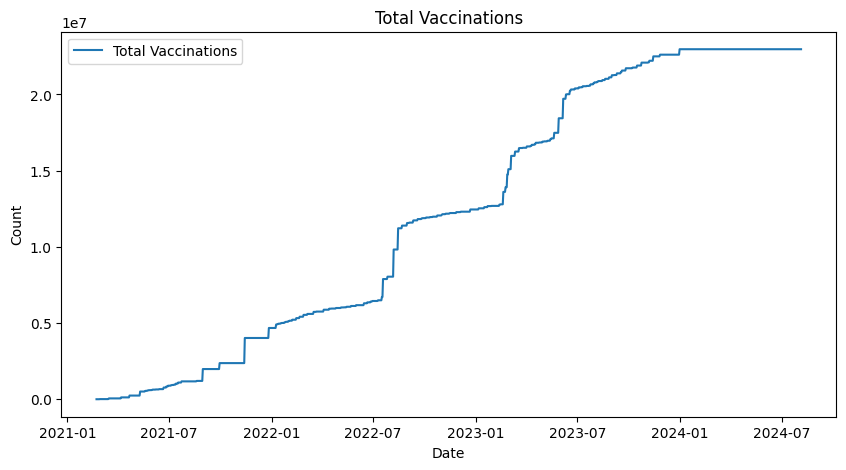

In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
df = pd.read_csv(url)

# Select relevant columns and preprocess
df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']]
df['date'] = pd.to_datetime(df['date'])
df.fillna(method='ffill', inplace=True)

# Sidebar for country selection
st.sidebar.title("COVID-19 Dashboard")
country = st.sidebar.selectbox("Select a country", df['location'].unique())

# Filter data based on country selection
country_data = df[df['location'] == country]

# Main Dashboard
st.title(f"COVID-19 Analysis for {country}")

# Plot 1: Total Cases and Deaths Over Time
st.subheader("Total Cases and Deaths Over Time")
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='total_cases', data=country_data, label='Total Cases')
sns.lineplot(x='date', y='total_deaths', data=country_data, label='Total Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Cases and Deaths')
st.pyplot(plt)

# Plot 2: New Cases and Deaths Over Time
st.subheader("New Cases and Deaths Over Time")
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='new_cases', data=country_data, label='New Cases')
sns.lineplot(x='date', y='new_deaths', data=country_data, label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('New Cases and Deaths')
st.pyplot(plt)

# Plot 3: Vaccinations Over Time
st.subheader("Vaccinations Over Time")
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='total_vaccinations', data=country_data, label='Total Vaccinations')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Vaccinations')
st.pyplot(plt)
